### Constants
```
stdin
stdout
stderr
```

### Functions
```
open
take!
fdio
flush
close
closewrite
write
    write(io::IO, x)
    write(filename::AbstractString, x)
    write(io, x, y, ...) equivalent to write(io, x) + write(io, y) + ...
read
    read(io::IO, T)
    read(io::IO, String)
    read(filename::AbstrctString, args...)
    read(filename::AbstractString, String)
    read(s::IO, nb=typemax(Int))
    read(s::IO, nb::Integer; all=true)
    read(cmd::Cmd)
    read(cmd::Cmd, String)
read!
    read!(stream::IO, array::AbstractArray)
    read!(filenam::AbstractString, array::AbstractArray)
    readbytes!(stream::IO, b::AbstractVector{UInt8}, nb=length(b))
    readbytes!(stream::IO, b::AbstractVector{UInt8}, nb=length(b); all::Bool=true)
unsafe_read
unsafe_write
readeach
peek
position
seek
seekstart
seekend
skip
mark
unmark
reset
ismarked
eof
isreadonly
iswritable
isreadable
isopen
fd
redirect_stdio
redirect_stdout
redirect_stderr
redirect_stdin
readchomp
truncate
skipchars
countlines
PipeBuffer
readavailable
```

##### Text Functions
```
show([io::IO = stdout], x)
summary
print
println
printstyled
sprint(f::Function, args...; context=nothing, sizehint=0)
showerror
dump(x; maxdepth=8)
@dump expr
readline
    readline(io::IO=stdin; keep::Bool=false)
    readline(filename::AbstractString; keep::Bool=false)
readuntil
    readuntil(stream::IO, delim; keep::Bool=false)
    readuntil(filename::AbstractString, delim; keep::Bool=false)
readlines
    readlines(io::IO=stdin; keep::Bool=false)
    readlines(filename::AbstractString; keep::Bool=false)
eachline
    eachline(io::IO=stdin; keep::Bool=false)
    eachline(filename::AbstractString; keep::Bool=false)
displaysize
```

#### Multimedia Functions
```
display
    display(x)
    display(d::AbstractDisplay, x)
    display(mime, x)
    display(d::AbstractDisplay, mime, x)
redisplay
displayable
show(io::IO, mime, x)
showable
repr
pushdisplay
popdisplay
istextmime
```

### Types
```
IOStream
IOBuffer
IOContext
```

#### Multimedia Types
```
AbstractDisplay
MIME
TextDisplay
```


File open modes -
| Mode | Description |
|------|-------------|
| `r` | read |
| `w` | write, create, truncate |
| `a` | write, create, append |
| `r+` | read, write |
| `w+` | read, write, create, truncate |
| `a+` | read, write, create, append |

### Basic read and write
`write` will write to contiguous memory in the IO buffer. Every invocation will append to the buffer. `read(io, T)` will take the entire buffer and interpret it as the provided type.

In [113]:
# Lets see the raw buffer contents
# First byte is 0x41 = 65, the ASCII value of A
# Second byte is 0x02, the number 2
io = IOBuffer()
nbytes_a = write(io, "A")
println("Wrote $nbytes_a bytes to io")
nbytes_2 = write(io, Int8(2))
println("Wrote $nbytes_2 bytes to io")
bytes = take!(io)
display(bytes[1])
display(bytes[2])

Wrote 1 bytes to io
Wrote 1 bytes to io


0x41

0x02

The first byte is 0x41 (65 in decimal, the ASCII value of A) and the second byte is 0x02, given the endianness of MacOS here is what it looks like in memory -
```
0000 0010 0100 0001
```

This is 0x241 in hex and 577 in decimal. Why doesn't this flip this and read as 0x412?

In [83]:
io = IOBuffer()
write(io, "A")
write(io, Int8(2))
seekstart(io)
read(io, Int16)

577

In [ ]:
io = IOBuffer("AB")
read(io, Char)

'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)

In [ ]:
io = IOBuffer("AB")
read(io, String)

"AB"

### Write to a file

In [114]:
# One line at a time
open("fileio.txt", "w+") do io
    write(io, "Programmatically adding a line.\n")
    write(io, "And another programmatic line.\n")
end

31

In [4]:
lines = """
It was the best of times,
it was the worst of times.
It was the age of wisdom,
it was the age of foolishness.
It was the epoch of belief,
it was the epoch of incredulity.
It was the season of Light,
it was the season of Darkness.
It was the spring of hope,
it was the winter of despair.
"""

"It was the best of times,\nit was the worst of times.\nIt was the age of wisdom,\nit was the age of foolishness.\nIt was the epoch of belief,\nit was the epoch of incredulity.\nIt was the season of Light,\nit was the season of Darkness.\nIt was the spring of hope,\nit was the winter of despair.\n"

In [115]:
# Write everything at once
write("totc.txt", lines)

287

In [116]:
# Another way to write everything at once
write("tp.txt", "hello", "world")

10

### Reading files

In [ ]:
for line in eachline("totc.txt")
    println("Line: $line")
end

Line: It was the best of times,
Line: it was the worst of times.
Line: It was the age of wisdom,
Line: it was the age of foolishness.
Line: It was the epoch of belief,
Line: it was the epoch of incredulity.
Line: It was the season of Light,
Line: it was the season of Darkness.
Line: It was the spring of hope,
Line: it was the winter of despair.


In [48]:
open("totc.txt") do io
    for line in readeach(io, String)
        println("Line: $line")
    end
end

Line: It was the best of times,
it was the worst of times.
It was the age of wisdom,
it was the age of foolishness.
It was the epoch of belief,
it was the epoch of incredulity.
It was the season of Light,
it was the season of Darkness.
It was the spring of hope,
it was the winter of despair.



In [117]:
lines = readlines("totc.txt")

10-element Vector{String}:
 "It was the best of times,"
 "it was the worst of times."
 "It was the age of wisdom,"
 "it was the age of foolishness."
 "It was the epoch of belief,"
 "it was the epoch of incredulity."
 "It was the season of Light,"
 "it was the season of Darkness."
 "It was the spring of hope,"
 "it was the winter of despair."

In [95]:
open("totc.txt") do io
    while !eof(io)
        println(readline(io))
    end
end

It was the best of times,
it was the worst of times.
It was the age of wisdom,
it was the age of foolishness.
It was the epoch of belief,
it was the epoch of incredulity.
It was the season of Light,
it was the season of Darkness.
It was the spring of hope,
it was the winter of despair.


### Misc

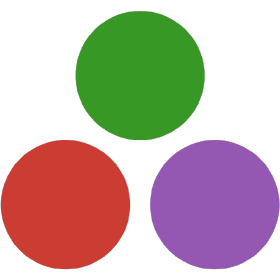

In [103]:
display("image/png", read("julia_logo.png"))

In [ ]:
read(Cmd(`ls`), String)

"1 Getting Started.ipynb\nUntitled.ipynb\nUntitled1.ipynb\narrays_vecs.ipynb\ncollections.md\ncomparison\nfile_io.ipynb\nfileio.txt\nscratch.jl\nscratch_jl.ipynb\nscratch_py.ipynb\ntotc.txt\ntp.txt\n"

In [ ]:
io = IOBuffer("hello\n\n")
readchomp(io)

"hello\n"

In [ ]:
printstyled("Hello", color=:red)

Hello